In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
# df = pd.read_csv("../hasil_ekstraksi_rata2_rgb.csv")
df = pd.read_csv("../../Code/Classification/train_data2.csv")
# df = pd.read_csv("../hasil_ekstraksi_rata2RGB_glcm.csv")
# df = pd.read_csv("../hasil_ekstraksi_orde1_glcm1.csv")
# df = pd.read_csv("../hasil_ekstraksi_orde1_glcm.csv")
df

,hist_r1,hist_r2,hist_r3,hist_r4,hist_r5,hist_r6,hist_r7,hist_r8,hist_r9,hist_r10,...,correlation 135,homogeneity 0,homogeneity 45,homogeneity 90,homogeneity 135,contrast 0,contrast 45,contrast 90,contrast 135,Label
0,0.001646,0.039038,0.207669,0.146596,0.063886,0.035679,0.029648,0.030528,0.024858,0.008947,...,8.605303e-07,4.192673e-07,4.150844e-07,4.197719e-07,4.156177e-07,0.000510,0.000549,0.000485,0.000557,1
1,0.015835,0.271105,0.212197,0.050067,0.018268,0.009250,0.005762,0.003873,0.002522,0.001520,...,8.691078e-07,4.452269e-07,4.452233e-07,4.507729e-07,4.366966e-07,0.000317,0.000380,0.000341,0.000404,1
2,0.103315,0.199026,0.174257,0.080620,0.039155,0.019731,0.011954,0.007497,0.004205,0.001967,...,9.019347e-07,4.103746e-07,4.019372e-07,4.081924e-07,4.075827e-07,0.000375,0.000465,0.000430,0.000443,1
3,0.103222,0.198996,0.174423,0.080561,0.039177,0.019845,0.011812,0.007533,0.004154,0.001996,...,9.007762e-07,4.081871e-07,4.074348e-07,4.103747e-07,4.017191e-07,0.000430,0.000443,0.000375,0.000465,1
4,0.116474,0.208589,0.178227,0.086086,0.042961,0.021757,0.012858,0.008022,0.004492,0.002145,...,9.155645e-07,3.978208e-07,3.904608e-07,3.914334e-07,3.899064e-07,0.000447,0.000514,0.000480,0.000542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000767,0.025029,0.113938,0.178202,0.180940,0.127132,0.057202,0.015685,0.004245,0.002074,...,9.651308e-07,4.012872e-07,3.985030e-07,4.013542e-07,3.985742e-07,0.000561,0.000606,0.000545,0.000598,5
796,0.000003,0.000735,0.012757,0.061054,0.132912,0.154670,0.166026,0.130787,0.058650,0.014018,...,9.905691e-07,4.251076e-07,4.209643e-07,4.234953e-07,4.203639e-07,0.000513,0.000568,0.000554,0.000592,5
797,0.005201,0.127529,0.225876,0.161088,0.088621,0.057062,0.026463,0.007203,0.002812,0.001569,...,9.433900e-07,4.061770e-07,4.024677e-07,4.091041e-07,4.043544e-07,0.000570,0.000611,0.000518,0.000612,5
798,0.003396,0.106331,0.198495,0.142571,0.078099,0.049343,0.022459,0.005612,0.002259,0.001335,...,9.038719e-07,4.378636e-07,4.312089e-07,4.359519e-07,4.323478e-07,0.000447,0.000520,0.000446,0.000501,5


In [3]:
X = df.drop(columns="label")
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

KeyError: "['label'] not found in axis"

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_scaled, y_train)


GaussianNB()

In [ ]:
predictions = model.predict(X_test_scaled)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00         7
           3       0.69      0.69      0.69        13
           4       0.36      0.44      0.40         9
           5       0.44      0.44      0.44         9

    accuracy                           0.64        44
   macro avg       0.70      0.65      0.67        44
weighted avg       0.67      0.64      0.65        44



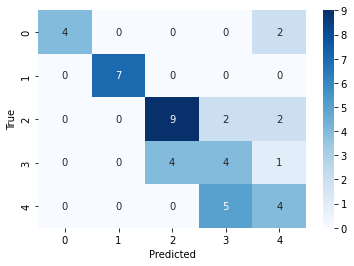

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# menghitung confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()